# o'reillyのカサゴ深層学習の本

## MINST学習（誤差逆伝播）

## [目次](TableOfContents.ipynb)
- [計算グラフ](#計算グラフ)
  - [計算グラフのレイヤの定義](#計算グラフのレイヤの定義)
  - [計算グラフの逆伝播](#計算グラフの逆伝播)
- [ニューラルネットワーク](#ニューラルネットワーク)
  - [ニューラルネットワークのレイヤの定義](#ニューラルネットワークのレイヤの定義)
  - [ニューラルネットワークの逆伝播](#ニューラルネットワークの逆伝播)

## 参考
- https://github.com/oreilly-japan/deep-learning-from-scratch/blob/master/notebooks/
- [深層学習（deep learning） - 開発基盤部会 Wiki](https://dotnetdevelopmentinfrastructure.osscons.jp/index.php?%E6%B7%B1%E5%B1%A4%E5%AD%A6%E7%BF%92%EF%BC%88deep%20learning%EF%BC%89)  
&gt; [ニューラルネットワーク](https://dotnetdevelopmentinfrastructure.osscons.jp/index.php?%E3%83%8B%E3%83%A5%E3%83%BC%E3%83%A9%E3%83%AB%E3%83%8D%E3%83%83%E3%83%88%E3%83%AF%E3%83%BC%E3%82%AF) &gt; [ニューラルネットワーク（学習）](https://dotnetdevelopmentinfrastructure.osscons.jp/index.php?%E3%83%8B%E3%83%A5%E3%83%BC%E3%83%A9%E3%83%AB%E3%83%8D%E3%83%83%E3%83%88%E3%83%AF%E3%83%BC%E3%82%AF%EF%BC%88%E5%AD%A6%E7%BF%92%EF%BC%89) &gt; [深層学習の誤差逆伝播法](https://dotnetdevelopmentinfrastructure.osscons.jp/index.php?%E6%B7%B1%E5%B1%A4%E5%AD%A6%E7%BF%92%E3%81%AE%E8%AA%A4%E5%B7%AE%E9%80%86%E4%BC%9D%E6%92%AD%E6%B3%95)

## 深層学習の誤差逆伝播法
https://dotnetdevelopmentinfrastructure.osscons.jp/index.php?%E6%B7%B1%E5%B1%A4%E5%AD%A6%E7%BF%92%E3%81%AE%E8%AA%A4%E5%B7%AE%E9%80%86%E4%BC%9D%E6%92%AD%E6%B3%95

### 計算グラフ
計算グラフで誤差逆伝播法を視覚的に理解するために使用する。

#### 計算グラフのレイヤの定義
基本的なレイヤの定義を行う。

##### 加算レイヤ

In [1]:
# 加算レイヤ
class AddLayer:
    def __init__(self):
        pass

    def forward(self, x, y):
        # 加算
        out = x + y

        return out

    def backward(self, dout):
        # １を乗算
        dx = dout * 1
        dy = dout * 1

        return dx, dy

##### 乗算レイヤ

In [2]:
# 乗算レイヤ
class MulLayer:
    def __init__(self):
        self.x = None
        self.y = None

    def forward(self, x, y):
        # 乗算
        self.x = x
        self.y = y                
        out = x * y

        return out

    def backward(self, dout):
        # 倍率を乗算
        dx = dout * self.y
        dy = dout * self.x

        return dx, dy

#### 計算グラフの逆伝播
以下の計算グラフの逆伝播で得られる値は、
- 連鎖率で微分を乗算していって得られた値で、
- 其々の値が１増えた時、その他の値に変更がない場合、最終結果に影響を与える大きさ。

##### 計算グラフの例１
以下の計算グラフの逆伝播で其々の値が１増えた時、  
その他の値に変更がない場合、最終結果に影響を与える大きさを計算。
<img src="../work/computational-graphs1.png" width="50%">

In [3]:
apple = 100
apple_num = 2
tax = 1.1

mul_apple_layer = MulLayer()
mul_tax_layer = MulLayer()

# forward
apple_price = mul_apple_layer.forward(apple, apple_num)
price = mul_tax_layer.forward(apple_price, tax)

# backward
dprice = 1 # 初期値は１（= dL/dL）
dapple_price, dtax = mul_tax_layer.backward(dprice)
dapple, dapple_num = mul_apple_layer.backward(dapple_price)

print("- forward -")
print("price:", int(price))

print("- backward -")
print("dApple:", dapple)
print("dApple_num:", int(dapple_num))
print("dTax:", dtax)

- forward -
price: 220
- backward -
dApple: 2.2
dApple_num: 110
dTax: 200


##### 計算グラフの例２
以下の計算グラフの逆伝播で其々の値が１増えた時、  
その他の値に変更がない場合、最終結果に影響を与える大きさを計算。
<img src="../work/computational-graphs2.png" width="50%">

In [4]:
apple = 100
apple_num = 2
orange = 150
orange_num = 3
tax = 1.1

# layer
mul_apple_layer = MulLayer()
mul_orange_layer = MulLayer()
add_apple_orange_layer = AddLayer()
mul_tax_layer = MulLayer()

# forward
apple_price = mul_apple_layer.forward(apple, apple_num)  # (1)
orange_price = mul_orange_layer.forward(orange, orange_num)  # (2)
all_price = add_apple_orange_layer.forward(apple_price, orange_price)  # (3)
price = mul_tax_layer.forward(all_price, tax)  # (4)

# backward
dprice = 1
dall_price, dtax = mul_tax_layer.backward(dprice)  # (4)
dapple_price, dorange_price = add_apple_orange_layer.backward(dall_price)  # (3)
dorange, dorange_num = mul_orange_layer.backward(dorange_price)  # (2)
dapple, dapple_num = mul_apple_layer.backward(dapple_price)  # (1)

print("- forward -")
print("price:", int(price))

print("- backward -")
print("dApple:", dapple)
print("dApple_num:", int(dapple_num))
print("dOrange:", dorange)
print("dOrange_num:", int(dorange_num))
print("dTax:", dtax)

- forward -
price: 715
- backward -
dApple: 2.2
dApple_num: 110
dOrange: 3.3000000000000003
dOrange_num: 165
dTax: 650


### ニューラルネットワーク

#### ニューラルネットワークのレイヤの定義
ココではニューラルネットワーク用のレイヤの定義を行う。

##### ここでのポイントは、
- ニューラルネットワークを計算グラフと捉え逆伝播を計算すると、
- (数値) 微分をせずに勾配 → 重みを計算できる点。
- backwardの出力は、forwardの入力の重み変数に対する勾配になる。
- 特にforwardでは、最後に誤差関数を用いるため、  
backwardは誤差を０にするような重みを求めるための勾配になる。
- 従って、各レイヤのクラスは以下のメソッドを持つ。
  - \_\_init\_\_(self, ...
  - def forward(self, ...
  - def backward(self, ...
- 各レイヤに実装されている処理は下記を参考にすると良い。
  - [前項](KasagoDL2.ipynb)
  - [common/layers.py](Kasago/common/layers.py)

##### 各レイヤとその定義

###### 中間層・出力層のレイヤ
- Affine  
中間層・出力層の重みとバイアスを処理するレイヤ

###### 中間層の活性化関数のレイヤ
- Sigmoid  
[中間層の活性化関数のSigmoid関数](KasagoDL1.ipynb)
- Relu  
[中間層の活性化関数のRelu関数](KasagoDL1.ipynb)

###### 出力層のSoftmax関数のレイヤ
- SoftmaxWithLoss  
[出力層の活性化関数のSoftmax関数](KasagoDL1.ipynb)と  
[交差エントロピー誤差の損失関数](KasagoDL2.ipynb)の両方が実装されている。

#### ニューラルネットワークの逆伝播
誤差逆伝播法で実装された２層ニューラルネットワーク。

##### 定義
- [common/layers.py](Kasago/common/layers.py)
- [common/gradient.py](Kasago/common/gradient.py)

In [5]:
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
from kasago.common.layers import *
from kasago.common.gradient import numerical_gradient
from collections import OrderedDict

# ２層ニューラルネットワーク・クラス
class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std = 0.01):
        # パラメタ（重みとバイアス）の初期化
        self.params = {}
        
        # ランダムな重み
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size) 
        
        # バイアス（０
        self.params['b1'] = np.zeros(hidden_size)
        self.params['b2'] = np.zeros(output_size)

        # レイヤの生成
        self.layers = OrderedDict()
        self.layers['Affine1'] = Affine(self.params['W1'], self.params['b1'])
        self.layers['Relu1'] = Relu()
        self.layers['Affine2'] = Affine(self.params['W2'], self.params['b2'])
        
        # 出力レイヤ
        self.lastLayer = SoftmaxWithLoss()
        
    def predict(self, x):
        # 推論
        
        # レイヤを順次取り出しながらforward実行
        for layer in self.layers.values():
            x = layer.forward(x)
        
        # 活性化関数（Relu）はlayers中に含まれる。
        
        return x
        
    # x:入力データ, t:教師データ
    def loss(self, x, t):
        # 勾配計算用関数
        
        # 推論（Affine.forward
        y = self.predict(x)
        
        # 損失関数（SoftmaxWithLoss.forward
        return self.lastLayer.forward(y, t)
    
    def accuracy(self, x, t):
        # 正解率計算用関数
        
        # 推論（分類
        y = self.predict(x)
        
        # y, tを揃える
        y = np.argmax(y, axis=1)
        if t.ndim != 1 : t = np.argmax(t, axis=1)
        
        # 正解率の計算
        accuracy = np.sum(y == t) / float(x.shape[0])
        
        return accuracy

    # 学習（確認用）
    # x:入力データ, t:教師データ
    def numerical_gradient(self, x, t):
        # 数値微分による勾配計算により、
        # predictとLearnを行う。
        
        # 勾配計算用関数
        loss_W = lambda W: self.loss(x, t)
        
        # 勾配計算
        # ヤヤコシイが
        #  - ココのnumerical_gradientはself.numerical_gradientじゃない。
        #  - なお、self.predictは、self.lossの中で実行されている。
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads
    
    # 学習（高速版）
    # x:入力データ, t:教師データ
    def gradient(self, x, t):
        # 誤差逆伝播法による勾配計算により、
        # predictとLearnを行う。
        
        # 勾配の計算
        
        # forward（predict
        self.loss(x, t)

        # backward（Learn
        dout = 1
        
        # 出力レイヤの逆順再生
        dout = self.lastLayer.backward(dout)
        
        # 中間レイヤの逆順再生
        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)

        # パラメタ（重みとバイアス）の更新
        grads = {}
        grads['W1'], grads['b1'] = self.layers['Affine1'].dW, self.layers['Affine1'].db
        grads['W2'], grads['b2'] = self.layers['Affine2'].dW, self.layers['Affine2'].db

        return grads

##### 実行

###### 数値微分と誤差逆伝播法の差
- 数値微分と誤差逆伝播法で算出した勾配の差を確認
- かなり小さい値になっていればOK（e^-10 前後）
- Import
  - [dataset/mnist.py](Kasago/dataset/mnist.py)

In [6]:
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
from kasago.dataset.mnist import load_mnist

# データの読み込み
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

# ２層ニューラルネット
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

# バッチサイズ３
x_batch = x_train[:3]
t_batch = t_train[:3]

# 数値微分と誤差逆伝播法で勾配算出

## 数値微分
grad_numerical = network.numerical_gradient(x_batch, t_batch)
## 誤差逆伝播法
grad_backprop = network.gradient(x_batch, t_batch)

# 算出した勾配の差を確認（コレを勾配確認と呼ぶ）
for key in grad_numerical.keys():
    diff = np.average(np.abs(grad_backprop[key] - grad_numerical[key]))
    print(key + ":" + str(diff))

W1:9.46285247203473e-07
b1:1.9370407739940745e-05
W2:5.382158794575472e-09
b2:1.3981720984324041e-07


###### 誤差逆伝播法でMISNTの画像認識
- Import
  - [dataset/mnist.py](Kasago/dataset/mnist.py)

In [7]:
import sys, os
sys.path.append(os.pardir) # 親ディレクトリのファイルをインポートするための設定
import numpy as np
from kasago.dataset.mnist import load_mnist

# データの読み込み
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

# ２層ニューラルネットワークの初期化
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

# パイパーパラメタ

# 繰り返し回数を適宜設定する
iters_num = 10000
# 学習率
learning_rate = 0.1

# 訓練データサイズ
train_size = x_train.shape[0]
# バッチサイズ
batch_size = 100
# サブセット数（イテレーション数）
iter_per_epoch = max(train_size / batch_size, 1)

# データサイズ / バッチサイズ = サブセット数になる。
# サブセット数は、そのまま、単位エポック毎のイテレーション数になる。
# 繰り返し回数をサブセット数（イテレーション数）で割るとエポック数になる。
# 繰り返し回数 * バッチサイズ = 実際に学習するデータの件数になる。
print("iters_num = %d" % iters_num)
print("train_size : batch_size = %d : %d" % (train_size, batch_size))
print("iter_per_epoch ≒ train_size / batch_size = %d" % iter_per_epoch)
print("epoch_num = iters_num / iter_per_epoch = %d" % (iters_num / iter_per_epoch))

# 結果を格納する変数
train_loss_list = []
train_acc_list = []
test_acc_list = []

for i in range(iters_num): # 繰り返し回数
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 学習
    
    # 数値微分は、都度、推論が必要なので遅過ぎて使えない。
    # grad = network.numerical_gradient(x_batch, t_batch)
    # 誤差逆伝播法の実用可能な高速版
    grad = network.gradient(x_batch, t_batch)
    
    # パラメタ（重みとバイアス）の更新
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    # 損失の記録
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    if i % iter_per_epoch == 0:# エポック毎
        
        # 正解率の計算
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        # 正解率の記録
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))
        
print("train and test have been completed.")

iters_num = 10000
train_size : batch_size = 60000 : 100
iter_per_epoch ≒ train_size / batch_size = 600
epoch_num = iters_num / iter_per_epoch = 16
train acc, test acc | 0.08446666666666666, 0.0874
train acc, test acc | 0.9058833333333334, 0.9087
train acc, test acc | 0.9217833333333333, 0.9217
train acc, test acc | 0.9356833333333333, 0.9366
train acc, test acc | 0.9431833333333334, 0.9407
train acc, test acc | 0.9527, 0.9485
train acc, test acc | 0.9560166666666666, 0.9514
train acc, test acc | 0.9592, 0.955
train acc, test acc | 0.96475, 0.9593
train acc, test acc | 0.9676833333333333, 0.9609
train acc, test acc | 0.9678833333333333, 0.962
train acc, test acc | 0.9708333333333333, 0.965
train acc, test acc | 0.9730333333333333, 0.9663
train acc, test acc | 0.9737, 0.9681
train acc, test acc | 0.9755666666666667, 0.9682
train acc, test acc | 0.9774333333333334, 0.9706
train acc, test acc | 0.9781333333333333, 0.9701
train and test have been completed.


###### 推移の描画

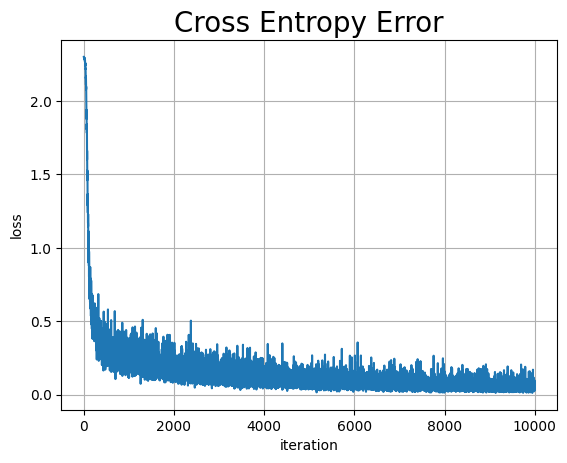

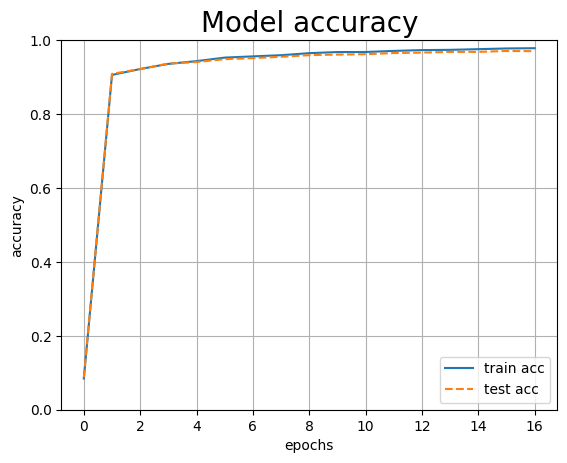

In [8]:
import matplotlib.pyplot as plt

# 損失の推移の描画
# タイトル
plt.title('Cross Entropy Error', fontsize=20)
# グリッド線
plt.grid()
# 折れ線グラフ
plt.plot(np.arange(1, iters_num + 1), train_loss_list)
# 軸ラベル
plt.xlabel('iteration')
plt.ylabel('loss')
plt.show()

# 正解率の推移の描画
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
# 範囲
plt.ylim(0, 1.0)
# タイトル
plt.title('Model accuracy', fontsize=20)
# グリッド線
plt.grid()
# 折れ線グラフ
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
# 軸ラベル
plt.xlabel("epochs")
plt.ylabel("accuracy")
# 凡例
plt.legend(loc='lower right')
plt.show()